# Tutorial 1 Behavioral Economics Summer Semester 2022

## Different types of discount functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-notebook')
MAX_TIME = 20 


In [6]:
def dum_samuelson(x, delta=0.9):
    return delta**x

def hyperbolic(x):
    return 1/(x+1)

def loewenstein(x, alpha = 10, beta = 5):
    m = (1 + alpha * x)
    e = beta/alpha
    return 1/(m**e)

def quasi_hyperbolic(x,beta=0.9, delta=0.9):
    return np.where(x > 0, beta*(delta**x), 1)



In [7]:
time = np.linspace(0,MAX_TIME + 1,1000)

y_a = dum_samuelson(time)
y_b = hyperbolic(time)
y_c = loewenstein(time)
y_d = quasi_hyperbolic(time)
#plt.plot(time,y_a, 'r', label="a")


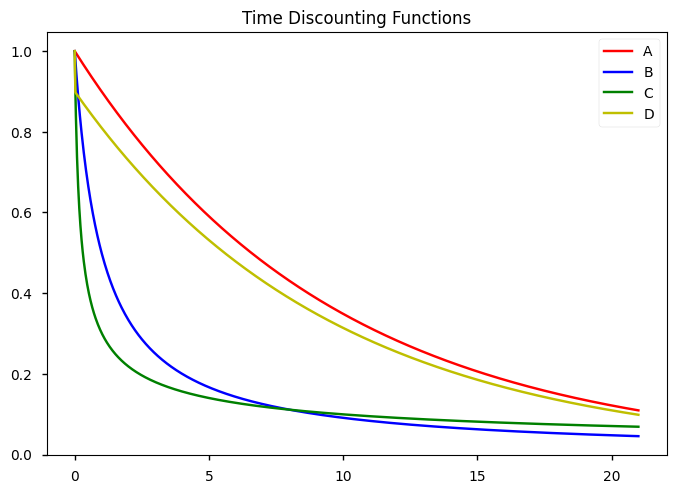

In [8]:
plt.plot(time,y_a, 'r', label="A")
plt.plot(time,y_b, 'b', label="B")
plt.plot(time,y_c, 'g', label="C")
plt.plot(time,y_d, 'y', label="D")
plt.legend()
plt.title("Time Discounting Functions")
plt.show()

In [ ]:
## Whats the interpretation?

## Interactive Plot Hyperbolic Discounting

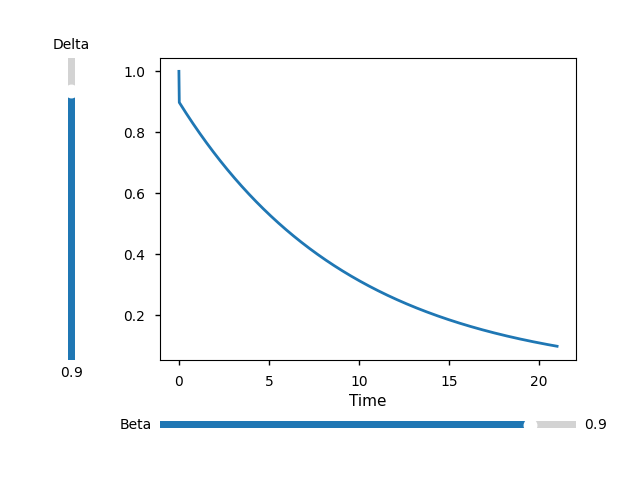

In [9]:
# Heavily uses https://matplotlib.org/stable/gallery/widgets/slider_demo.html

%matplotlib widget



# The parametrized function to be plotted
def f(x,beta=0.9, delta=0.9):
    return np.where(x > 0, beta*(delta**x), 1)

t = np.linspace(0, MAX_TIME + 1, 1000)

# Define initial parameters
init_beta = 0.9
init_delta = 0.9

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_beta, init_delta), lw=2)
ax.set_xlabel('Time')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
ax_beta = plt.axes([0.25, 0.1, 0.65, 0.03])
beta_slider = Slider(
    ax=ax_beta,
    label='Beta',
    valmin=0.1,
    valmax=1,
    valinit=init_beta,
)

# Make a vertically oriented slider to control the amplitude
ax_delta = plt.axes([0.1, 0.25, 0.0225, 0.63])
delta_slider = Slider(
    ax=ax_delta,
    label="Delta",
    valmin=0.1,
    valmax=1,
    valinit=init_delta,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, beta_slider.val, delta_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
beta_slider.on_changed(update)
delta_slider.on_changed(update)

#fig.title("Quasi-hyperbolic Discount Function")
plt.show()